# Worksheet 16

Name: Kian Boon Tan

UID: U93983891

### Topics

- Support Vector Machines (Non-linear case)

## Support Vector Machines

Follow along in class to implement the perceptron algorithm and create an animation of the algorithm.

a) As we saw in class, the form
$$w^T x + b = 0$$
while simple, does not expose the inner product `<x_i, x_j>` which we know `w` depends on, having done the math. This is critical to applying the "kernel trick" which allows for learning non-linear decision boundaries. Let's modify the above algorithm to use the form
$$\sum_i \alpha_i <x_i, x> + b = 0$$

In [1]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

TEMPFILE = "temp.png"
CENTERS = [[0, 1], [1, 0]]

epochs = 100
learning_rate = .05
expanding_rate = .99
retracting_rate = 1.1

X, labels = datasets.make_blobs(n_samples=10, centers=CENTERS, cluster_std=0.2, random_state=0)
Y = np.array(list(map(lambda x : -1 if x == 0 else 1, labels.tolist())))

alpha_i = np.zeros((len(X),))
b = 0

def snap(x, alpha_i, b, error):
    # create a mesh to plot in
    h = .01  # step size in the mesh
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    meshData = np.c_[xx.ravel(), yy.ravel()]
    cs = np.array([x for x in 'gb'])
    fig, ax = plt.subplots()
    ax.scatter(X[:,0],X[:,1],color=cs[labels].tolist(), s=50, alpha=0.8)

    if error:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='r',fill=False))
    else:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='y',fill=False))
   
    Z = predict_many(alpha_i, b, meshData)
    Z = np.array([0 if z <=0 else 1 for z in Z]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=.5, cmap=plt.cm.Paired)
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))

def predict_many(alpha_i, b, Z):
    res = []
    for i in range(len(Z)):
        res.append(predict(alpha_i, b, Z[i]))
    return np.array(res)

def predict(alpha_i, b, x):
    # Use the alternative summation form.
    wx = 0
    for j in range(len(X)):
        wx += alpha_i[j] * np.dot(X[j], x)
    return wx + b

images = []
for _ in range(epochs):
    # pick a point from X at random
    i = np.random.randint(0, len(X))
    error = False
    x, y = X[i], Y[i]
    
    # Figure out if classed correctly.
    y_predict = predict(alpha_i, b, x)
    
    if not ((y < 0 and y_predict < 0) or (y >= 0 and y_predict >= 0)):
        # misclassified
        error = True
        
        # move in the direction of the point
        alpha_i[i] += y * learning_rate
        alpha_i = alpha_i * expanding_rate
        b += y * learning_rate * expanding_rate
        
        # expand
        alpha_i = alpha_i * expanding_rate
        b = b * expanding_rate
    
    else:
        # are you in the street
        if (y_predict < 1) and (y_predict > -1):
            # yes
            alpha_i[i] += y * learning_rate
            alpha_i = alpha_i * retracting_rate           
            b += y * learning_rate * retracting_rate
        
    images.append(snap(x, alpha_i, b, error))

images[0].save(
    'svm_dual.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=100
)

Write a configurable kernel function to apply in lieu of the dot product. Try it out on a dataset that is not linearly separable.

In [2]:
def polynomial(x_i, x_j, c, n):
    return (np.dot(x_i, x_j) + c) ** n

b) Assume we fit an SVM using a polynomial Kernel function and it seems to overfit the data. How would you adjust the tuning parameter `n` of the kernel function?

We would reduce `n` to reduce the complexity of the model, which might have led to the overfitting.

c) Assume we fit an SVM using a RBF Kernel function and it seems to underfit the data. How would you adjust the tuning parameter `sigma` of the kernel function?

We would increase `sigma` to increase the complexity of the model, to capture more patterns in the data we observe.

d) Tune the parameter of a specific Kernel function, to fit an SVM (using your code above) to the following dataset:

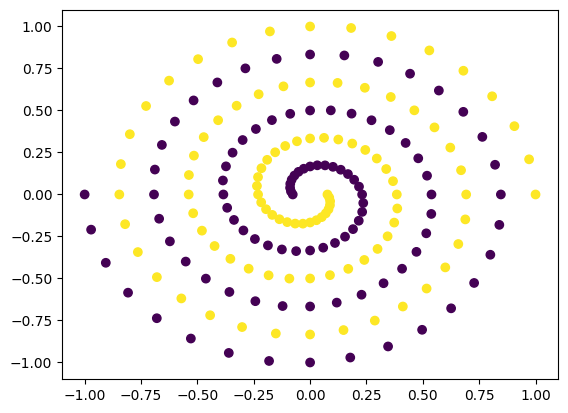

In [3]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("spiral.data")
X, Y = data[:, :2], data[:, 2]

plt.scatter(X[:,0], X[:,1], c=Y)

"\nimages[0].save(\n    'svm_radial.gif',\n    optimize=False,\n    save_all=True,\n    append_images=images[1:],\n    loop=0,\n    duration=100\n)\n"

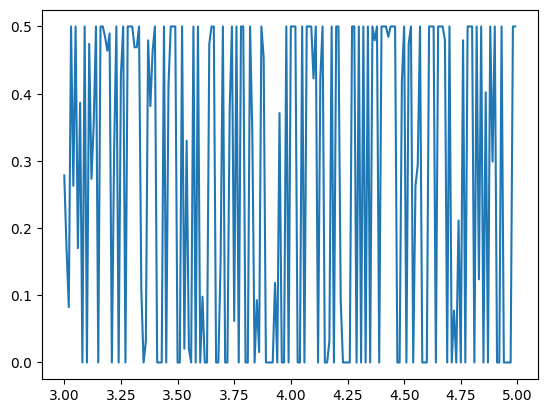

In [20]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

def rbf_kernel(x_i, x_j, sigma):
    return np.exp(np.linalg.norm(x_i - x_j) / sigma)

def predict_many_radial(alpha_i, b, Z):
    res = []
    for i in range(len(Z)):
        res.append(predict_radial(alpha_i, b, Z[i]))
    return np.array(res)

def predict_radial(alpha_i, b, x):
    # Use the alternative summation form.
    wx = 0
    for j in range(len(X)):
        wx += alpha_i[j] * rbf_kernel(X[j], x, sigma)
    return wx + b

def fit_model(sigma):
    # Define constants and parameters.
    images = []
    X, Y = data[:, :2], data[:, 2]

    epochs = 100
    learning_rate = .05
    expanding_rate = .99
    retracting_rate = 1.1

    alpha_i = np.zeros((len(X),))
    b = 0
    for _ in range(epochs):
        # pick a point from X at random
        i = np.random.randint(0, len(X))
        error = False
        x, y = X[i], Y[i]

        # Figure out if classed correctly.
        y_predict = predict_radial(alpha_i, b, x)

        if not ((y < 0 and y_predict < 0) or (y >= 0 and y_predict >= 0)):
            # misclassified
            error = True

            # move in the direction of the point
            alpha_i[i] += y * learning_rate
            alpha_i = alpha_i * expanding_rate
            b += y * learning_rate * expanding_rate

            # expand
            alpha_i = alpha_i * expanding_rate
            b = b * expanding_rate

        else:
            # are you in the street
            if (y_predict < 1) and (y_predict > -1):
                # yes
                alpha_i[i] += y * learning_rate
                alpha_i = alpha_i * retracting_rate           
                b += y * learning_rate * retracting_rate

    # Report accuracy score.
    # Calculate predictions with final parameters.
    Z = predict_many_radial(alpha_i, b, X)
    Z = np.array([0 if z <=0 else 1 for z in Z])

    positives = 0
    for i in range(len(Y)):
        # positive result
        if Y[i] == Z[i]:
            positives += 1

    return positives / len(Y)

sigmas = []
scores = []

# Try to tune model with sigma.
for i in range(200):
    sigma = i / 100 + 3
    score = fit_model(sigma)
    sigmas.append(sigma)
    scores.append(score)
    
plt.plot(sigmas, scores)
"""
images[0].save(
    'svm_radial.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=100
)
"""

In [22]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

TEMPFILE = "temp.png"

def rbf_kernel(x_i, x_j, sigma):
    return np.exp(np.linalg.norm(x_i - x_j) / sigma)

def snap_radial(x, alpha_i, b, error):
    # create a mesh to plot in
    h = .1  # step size in the mesh
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    meshData = np.c_[xx.ravel(), yy.ravel()]
    fig, ax = plt.subplots()
    ax.scatter(X[:,0],X[:,1],c=Y, s=50, alpha=0.8)

    if error:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='r',fill=False))
    else:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='y',fill=False))
   
    Z = predict_many_radial(alpha_i, b, meshData)
    Z = np.array([0 if z <=0 else 1 for z in Z]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=.5, cmap=plt.cm.Paired)
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))

def predict_many_radial(alpha_i, b, Z):
    res = []
    for i in range(len(Z)):
        res.append(predict_radial(alpha_i, b, Z[i]))
    return np.array(res)

def predict_radial(alpha_i, b, x):
    # Use the alternative summation form.
    wx = 0
    for j in range(len(X)):
        wx += alpha_i[j] * rbf_kernel(X[j], x, sigma)
    return wx + b

def fit_model(sigma):
    # Define constants and parameters.
    images = []
    X, Y = data[:, :2], data[:, 2]

    epochs = 200
    learning_rate = .05
    expanding_rate = .99
    retracting_rate = 1.1

    alpha_i = np.zeros((len(X),))
    b = 0
    for _ in range(epochs):
        # pick a point from X at random
        i = np.random.randint(0, len(X))
        error = False
        x, y = X[i], Y[i]

        # Figure out if classed correctly.
        y_predict = predict_radial(alpha_i, b, x)

        if not ((y < 0 and y_predict < 0) or (y >= 0 and y_predict >= 0)):
            # misclassified
            error = True

            # move in the direction of the point
            alpha_i[i] += y * learning_rate
            alpha_i = alpha_i * expanding_rate
            b += y * learning_rate * expanding_rate

            # expand
            alpha_i = alpha_i * expanding_rate
            b = b * expanding_rate

        else:
            # are you in the street
            if (y_predict < 1) and (y_predict > -1):
                # yes
                alpha_i[i] += y * learning_rate
                alpha_i = alpha_i * retracting_rate           
                b += y * learning_rate * retracting_rate

        images.append(snap_radial(x, alpha_i, b, error))
        
    return images

images = fit_model(4)

images[0].save(
    'svm_radial.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=100
)